## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the datahttp://localhost:8888/notebooks/Desktop/GL/Project%205%20ML/Project/PROBLEM%201.ipynb#
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")


1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

## Importing data

In [2]:
df=pd.read_excel("C:/Users/212548638/Desktop/GL/Project 5 ML/Project/Election_Data.xlsx", 'Election_Dataset_Two Classes' )

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


## EDA

**Shape**

In [5]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


Droping "Unnamed: 0" as it is insignificant

In [6]:
df.drop("Unnamed: 0",axis=1,inplace =True)

In [7]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [9]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


**Data type of data features**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


**Making different list for categorical columns and numerical columns**


In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


# Data preprocessing




we need some summary statistics of our dataframe. For this, we can use describe() 
method. It can be used to generate various summary statistics.

#### Describe for numerical and categorical columns


In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [13]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


**Null value Check**

In [14]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

The above output shows that there is no “null” value in our dataset.

**Are there any duplicate records, Check for duplicate data**

In [15]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


These duplicates need to be dropped because they do not add any value to the study, be it associated with different people.

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [19]:
print('Number of row after dropping them = %d' % (df.shape[0]))

Number of row after dropping them = 1517


In [20]:
print("Skewness values"'\n',df.skew())

Skewness values
 age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64


In [21]:
#Changing the name of the few variables who are having dot and replacing it with underscore.
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"}, inplace = True)

In [22]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

### unique values for categorical variables

In [23]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [24]:
df['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

### unique values for numerical variables

In [25]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

AGE :  70
91     1
93     1
90     1
92     2
87     3
      ..
46    37
47    38
35    38
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC_COND_NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic_cond_national, dtype: int64


ECONOMIC_COND_HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic_cond_household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL_KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political_knowledge, dtype: int64




1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

**Univariate Analysis**

In [26]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [27]:
df_num = df.select_dtypes(include = ['int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


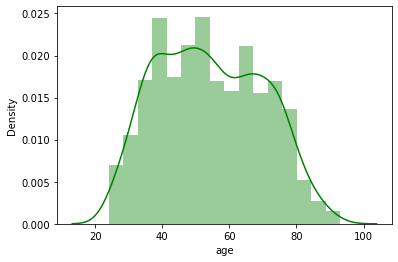

BoxPlot of age
----------------------------------------------------------------------------


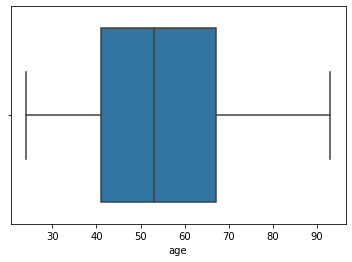

Description of economic_cond_national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_national, dtype: float64 Distribution of economic_cond_national
----------------------------------------------------------------------------


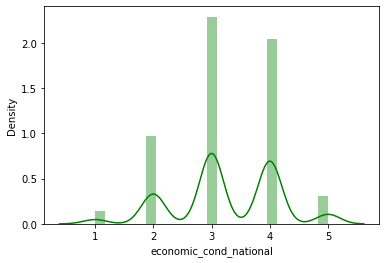

BoxPlot of economic_cond_national
----------------------------------------------------------------------------


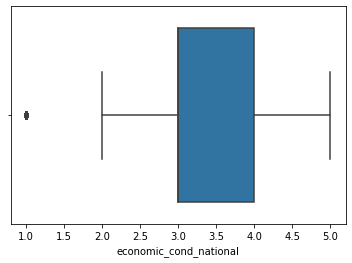

Description of economic_cond_household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_household, dtype: float64 Distribution of economic_cond_household
----------------------------------------------------------------------------


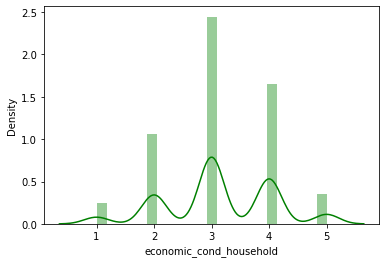

BoxPlot of economic_cond_household
----------------------------------------------------------------------------


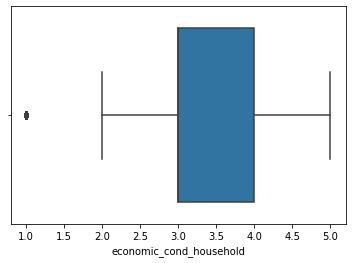

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


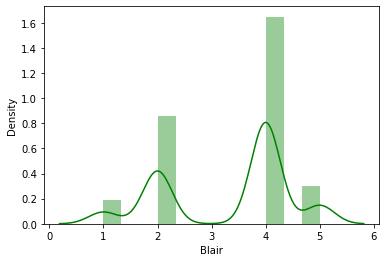

BoxPlot of Blair
----------------------------------------------------------------------------


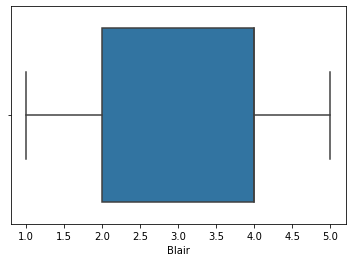

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


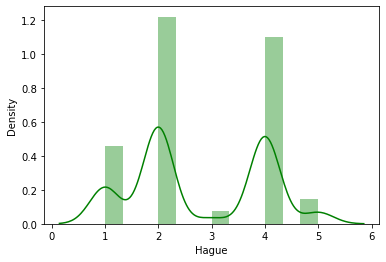

BoxPlot of Hague
----------------------------------------------------------------------------


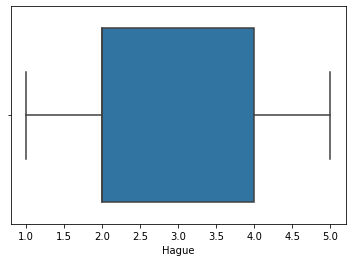

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


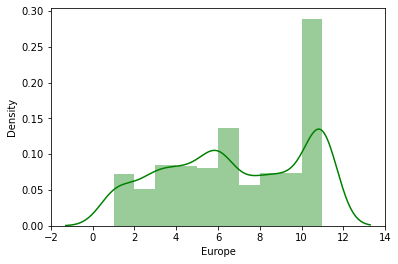

BoxPlot of Europe
----------------------------------------------------------------------------


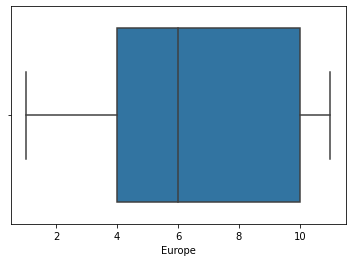

Description of political_knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political_knowledge, dtype: float64 Distribution of political_knowledge
----------------------------------------------------------------------------


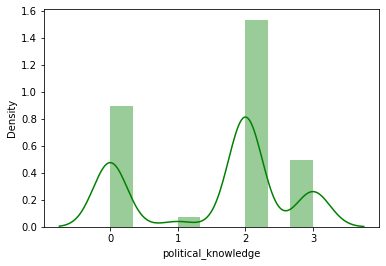

BoxPlot of political_knowledge
----------------------------------------------------------------------------


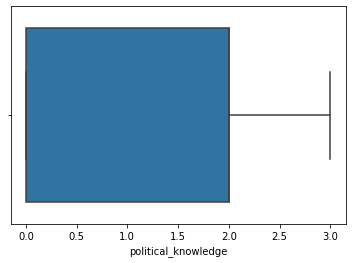

In [28]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

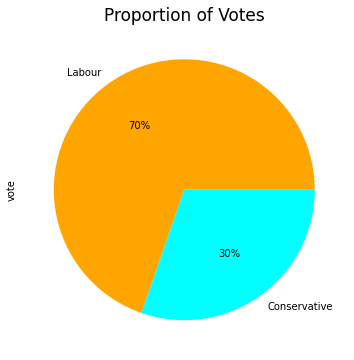

In [29]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);



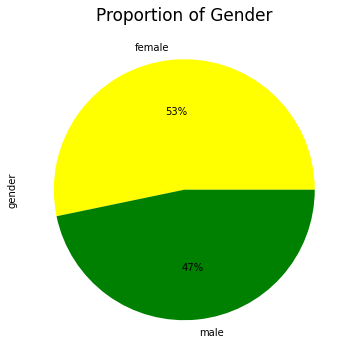

In [30]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

<Figure size 864x576 with 0 Axes>

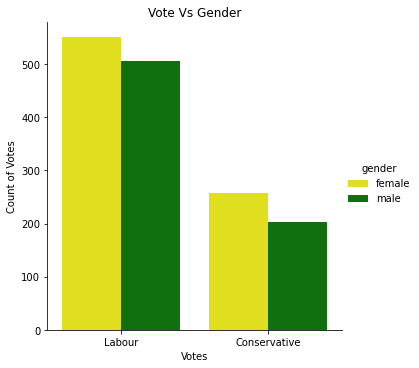

In [31]:


plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');



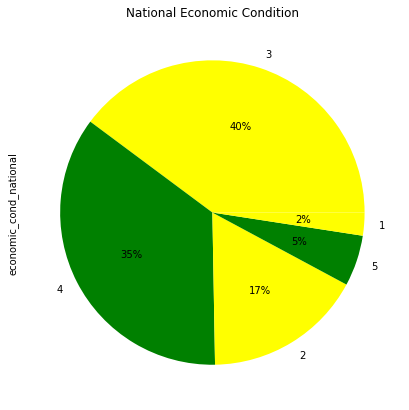

In [32]:
plt.figure(figsize=(8,7))
df.economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition')
plt.show()


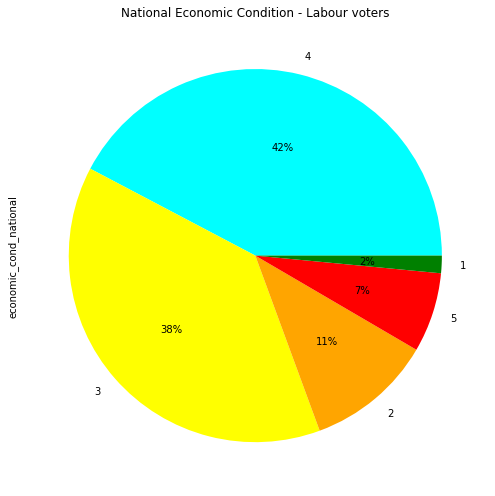

In [33]:
plt.figure(figsize=(9,7))
colors = ['cyan','yellow','orange','red','green']
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
plt.tight_layout()

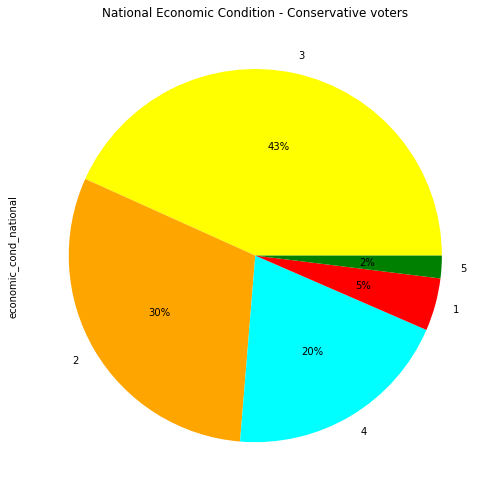

In [34]:


plt.figure(figsize=(8,7))
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.tight_layout();



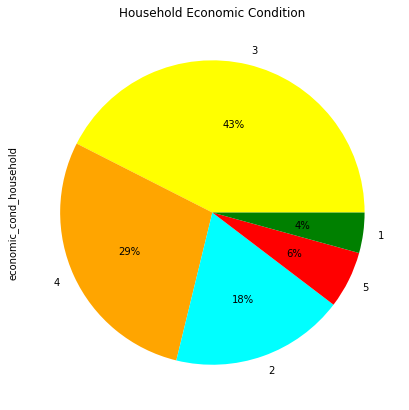

In [35]:
plt.figure(figsize=(8,7))
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()



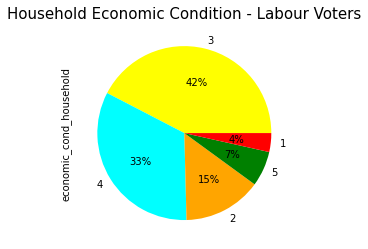

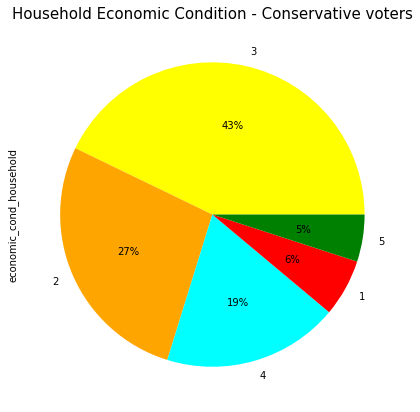

In [36]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters',fontsize=15)
plt.figure(figsize=(8,7))
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters',fontsize=15)
plt.show()



###  Bivariate and Multivariate Analysis

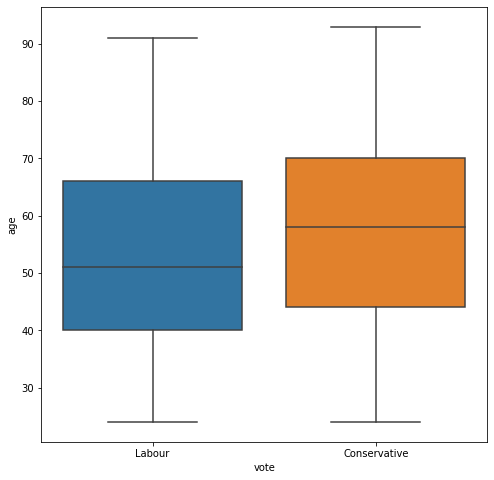

In [37]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['age']) 
plt.show()

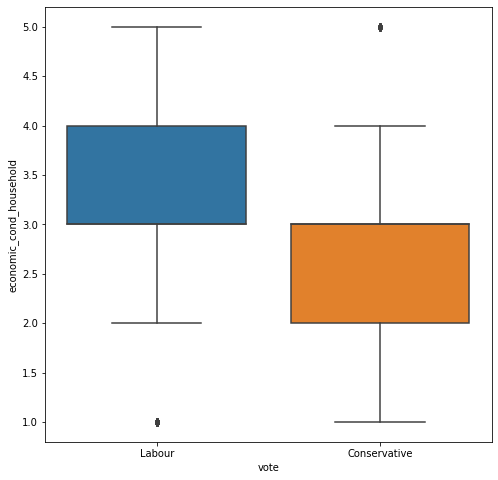

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['economic_cond_household']) 
plt.show()

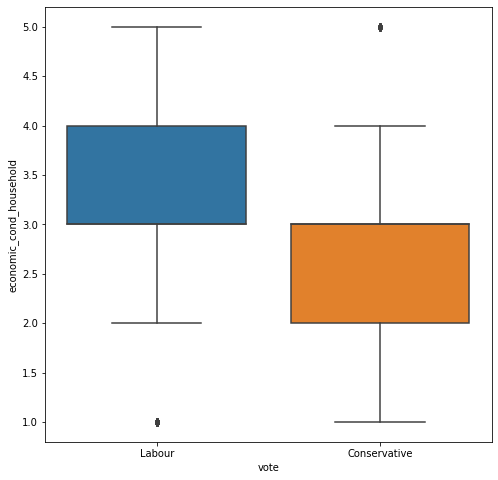

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['economic_cond_household']) 
plt.show()

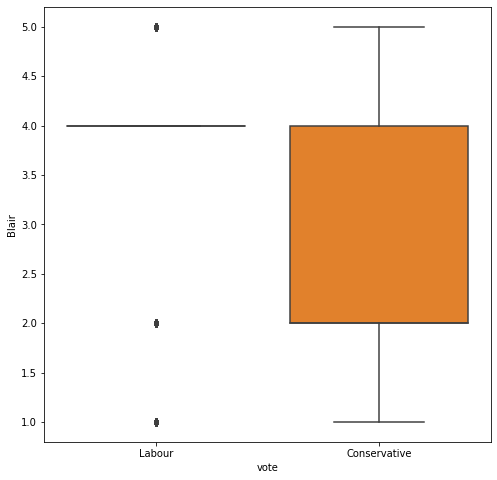

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['Blair']) 
plt.show()

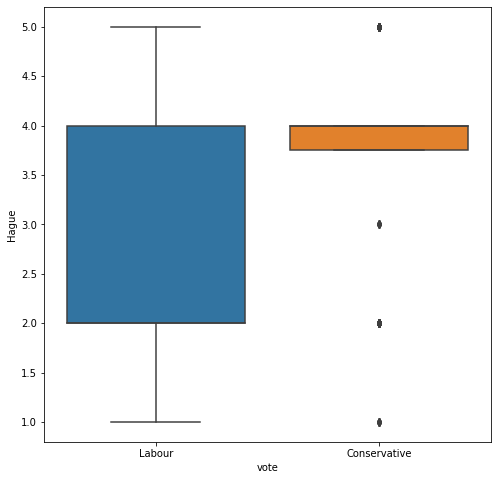

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['Hague']) 
plt.show()

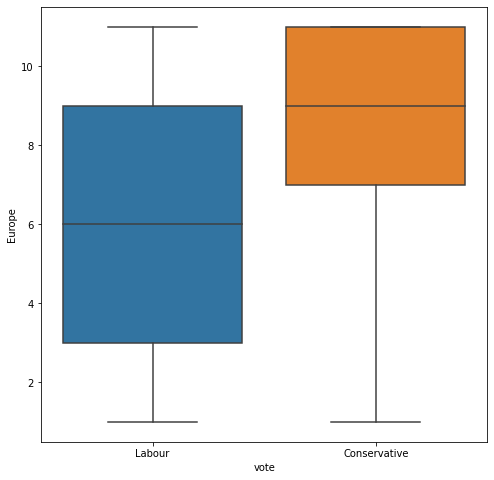

In [42]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['Europe']) 
plt.show()

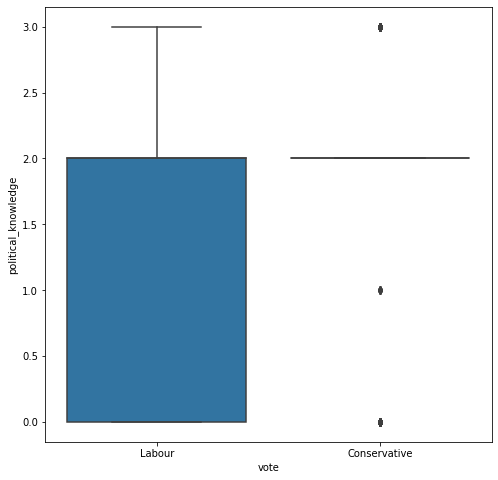

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['political_knowledge']) 
plt.show()

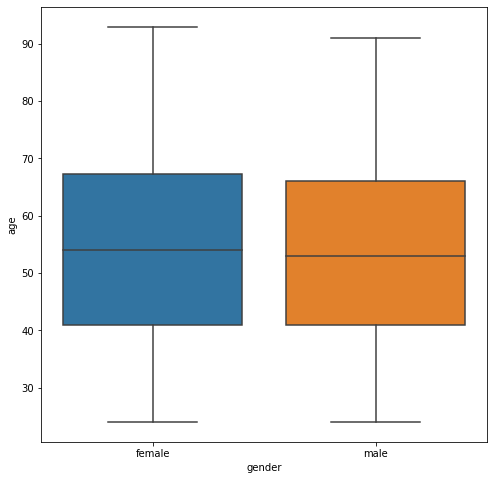

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['age']) 
plt.show()

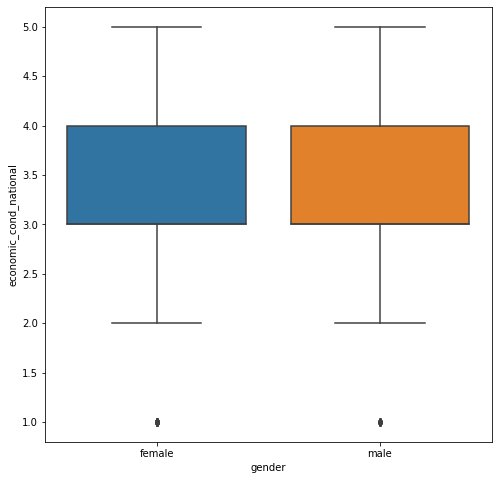

In [45]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['economic_cond_national']) 
plt.show()

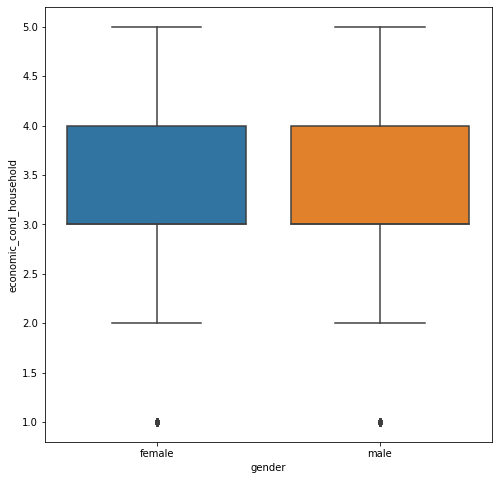

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['economic_cond_household']) 
plt.show()

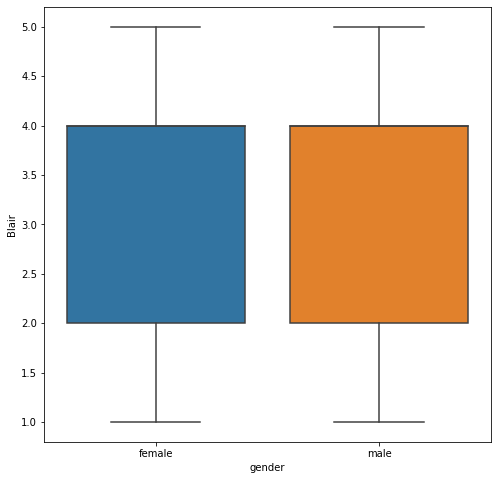

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['Blair']) 
plt.show()

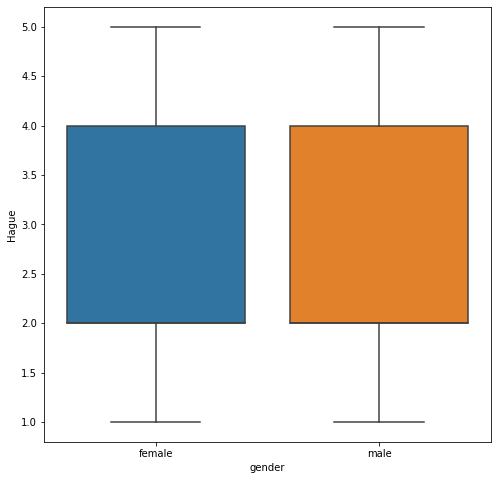

In [48]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['Hague']) 
plt.show()

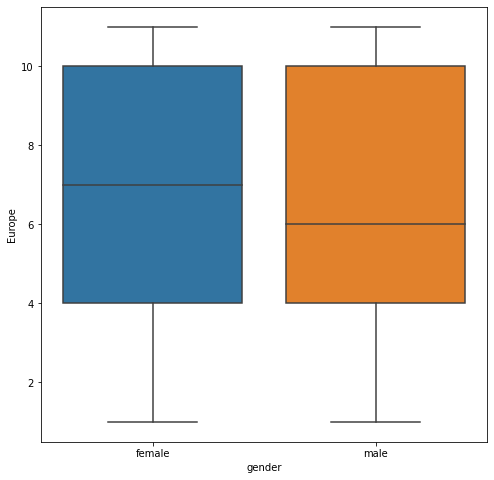

In [49]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['Europe']) 
plt.show()

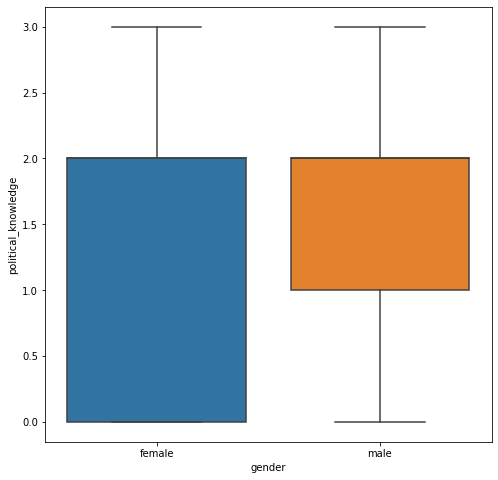

In [50]:
plt.figure(figsize=(8,8))
sns.boxplot(df["gender"], df['political_knowledge']) 
plt.show()

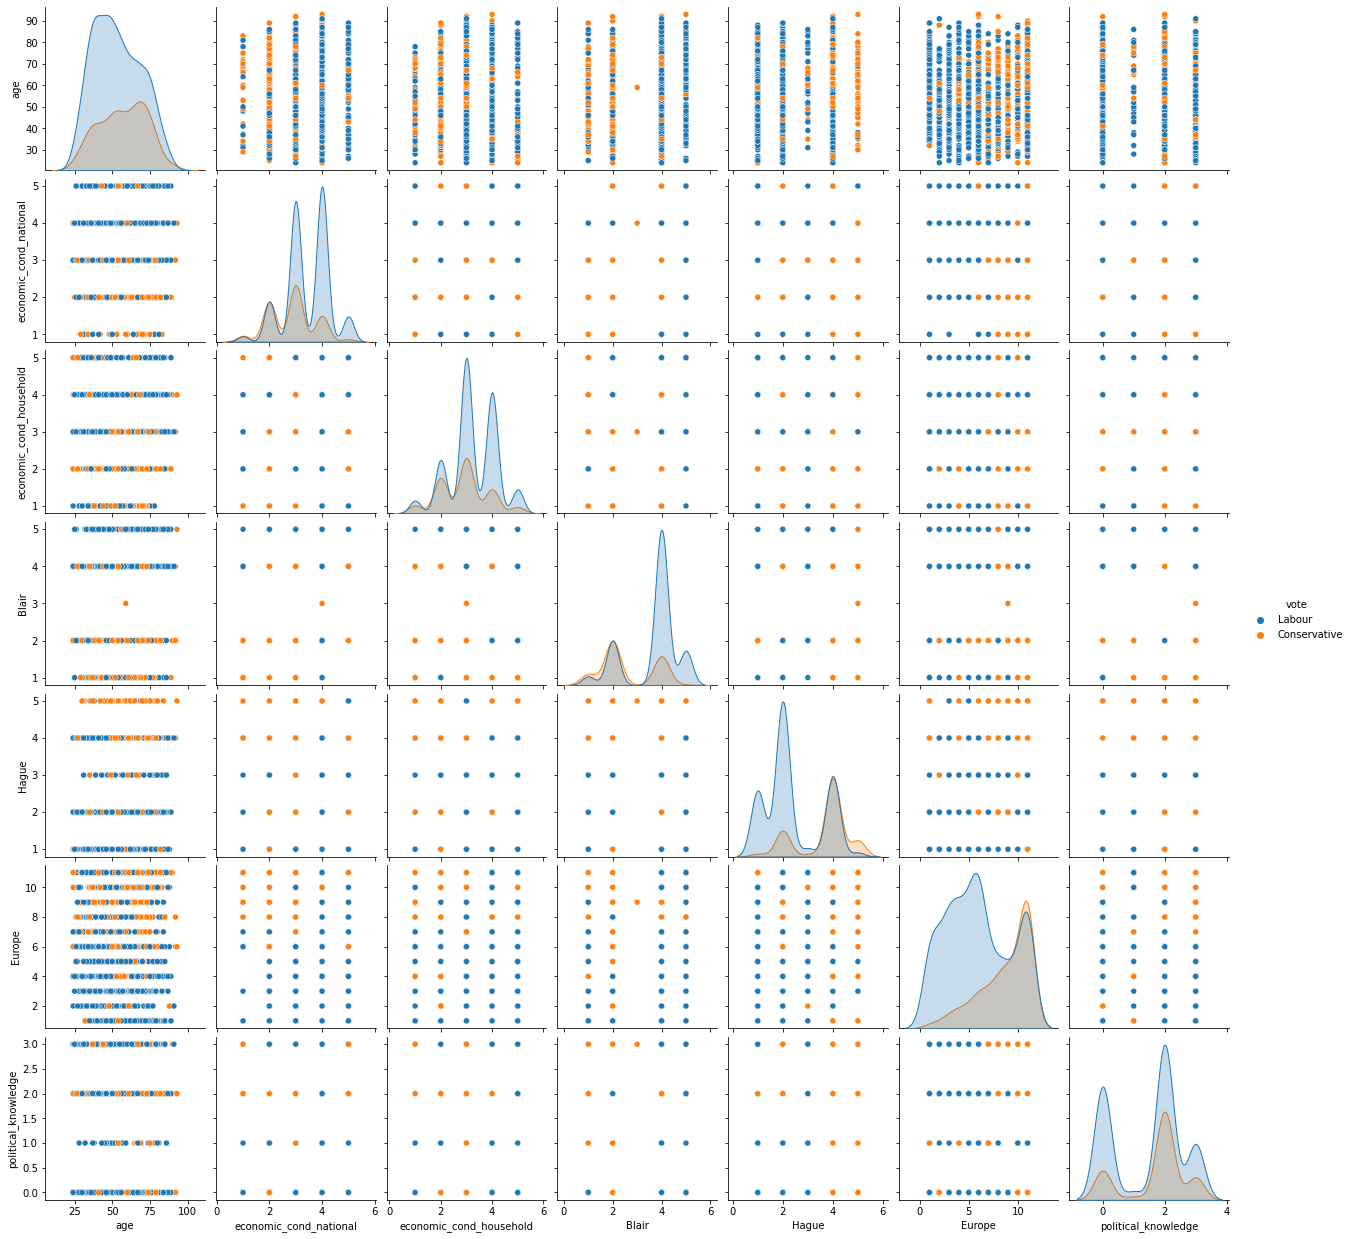

In [51]:
sns.pairplot(df, hue = 'vote')

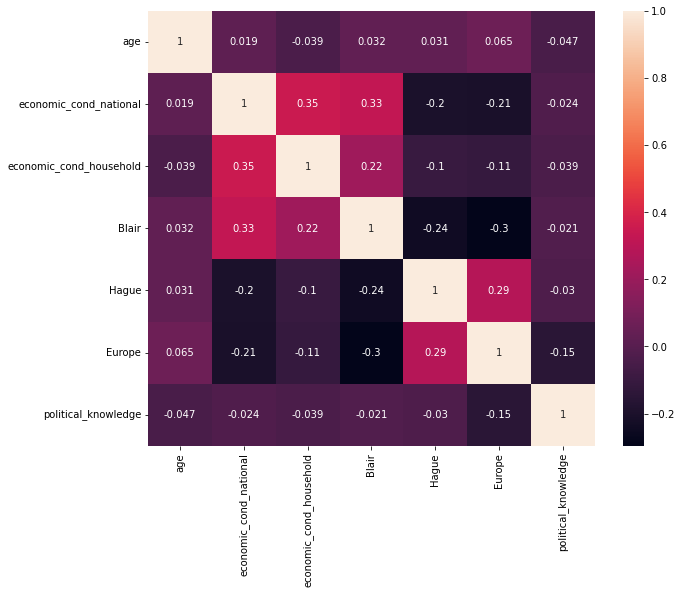

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [53]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
economic_cond_national  economic_cond_household     0.347687
                        Blair                       0.326141
Blair                   Europe                      0.295944
Hague                   Europe                      0.285738
Blair                   Hague                       0.243508
economic_cond_household Blair                       0.215822
economic_cond_national  Europe                      0.209150
                        Hague                       0.200790
Europe                  political_knowledge         0.151197
                        economic_cond_household     0.112897
economic_cond_household Hague                       0.100392
age                     Europe                      0.064562
political_knowledge     age                         0.046598
age                     economic_cond_household     0.038868
economic_cond_household political_knowledge         0.038528
age                     Blair                       0.032084
Hague                   age                         0.031144
                        political_knowledge         0.029906
political_knowledge     economic_cond_national      0.023510
                        Blair                       0.021299
economic_cond_national  age                         0.018687

There are outliers in economic_cond_national & economic_cond_household variable. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So, depending on our use case, it makes sense to remove outlier. 

### outlier treatment 
As there are no outliers in continuous variables, we will not remove outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur=remove_outlier(df["economic_cond_national"])
df["economic_cond_national"]=np.where(df["economic_cond_national"]>ur,ur,df["economic_cond_national"])
df["economic_cond_national"]=np.where(df["economic_cond_national"]<lr,lr,df["economic_cond_national"])

lr,ur=remove_outlier(df["economic_cond_household"])
df["economic_cond_household"]=np.where(df["economic_cond_household"]>ur,ur,df["economic_cond_household"])
df["economic_cond_household"]=np.where(df["economic_cond_household"]<lr,lr,df["economic_cond_household"])

plt.figure(figsize=(10,10))
df.boxplot(vert=0)

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [54]:
cat

['vote', 'gender']

In [55]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [56]:
## Applying the created Label Encoder object for the target class
## Assigning the 1 to Labour and 0 to conservative

df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


In [57]:
df.tail()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
1520,0,67,5,3,2,4,11,3,male
1521,0,73,2,2,4,4,8,2,male
1522,1,37,3,3,5,4,2,2,male
1523,0,61,3,3,1,4,11,2,male
1524,0,74,2,3,2,4,11,0,female


In [58]:
df =pd.get_dummies(df, columns={'gender'},drop_first=True)

In [59]:
df

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1520,0,67,5,3,2,4,11,3,1
1521,0,73,2,2,4,4,8,2,1
1522,1,37,3,3,5,4,2,2,1
1523,0,61,3,3,1,4,11,2,1


In [60]:
df.shape

(1517, 9)

In [61]:
df

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1520,0,67,5,3,2,4,11,3,1
1521,0,73,2,2,4,4,8,2,1
1522,1,37,3,3,5,4,2,2,1
1523,0,61,3,3,1,4,11,2,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int32(1), int64(7), uint8(1)
memory usage: 134.5 KB


**Train-Test Split**
Split X and y into training and test set in 70:30 ratio with random_state=1

In [63]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [64]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',1061+456)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)
Total Obs 1517


In [66]:
print("y_train_value_counts"'\n', y_train.value_counts())


y_train_value_counts
 1    754
0    307
Name: vote, dtype: int64


In [67]:
print("y_test_value_counts"'\n', y_test.value_counts())

y_test_value_counts
 1    303
0    153
Name: vote, dtype: int64


1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)


In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## Logistic Regression without model tuning

In [69]:
# Fit the Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

### Predicting on Training and Test dataset

In [70]:
y_train_predict = LR_model.predict(X_train)
y_test_predict = LR_model.predict(X_test)


### Getting the Predicted Classes and Probs

In [71]:
y_train_predict_prob=LR_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_prob).head(10)

,0,1
0,0.929731,0.070269
1,0.095442,0.904558
2,0.310855,0.689145
3,0.106232,0.893768
4,0.015998,0.984002
5,0.054584,0.945416
6,0.177538,0.822462
7,0.005527,0.994473
8,0.632390,0.367610
9,0.119685,0.880315


In [72]:
y_test_predict_prob=LR_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.427060,0.572940
1,0.146327,0.853673
2,0.005664,0.994336
3,0.846475,0.153525
4,0.060610,0.939390
5,0.065159,0.934841
6,0.381721,0.618279
7,0.195965,0.804035
8,0.039022,0.960978
9,0.123956,0.876044


## Model Evaluation

In [73]:
# Accuracy - Training Data
LR_model.score(X_train, y_train)

0.8350612629594723

### Confusion Matrix & classification report for the training data

In [74]:
confusion_matrix(y_train, y_train_predict)

array([[199, 108],
       [ 67, 687]], dtype=int64)

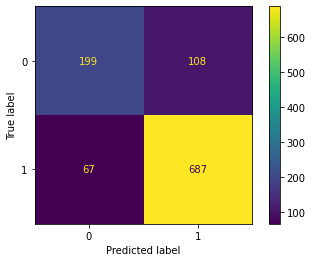

In [75]:
plot_confusion_matrix(LR_model,X_train, y_train);

In [76]:
print("classification_report on training data")
print(classification_report(y_train, y_train_predict))

classification_report on training data
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



### AUC and ROC for the training data

AUC: 0.890


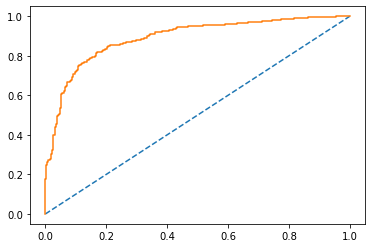

In [77]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [78]:
# Accuracy - Test Data
LR_model.score(X_test, y_test)

0.8245614035087719

### Confusion Matrix & classification report for test data

In [79]:
confusion_matrix(y_test, y_test_predict)

array([[110,  43],
       [ 37, 266]], dtype=int64)

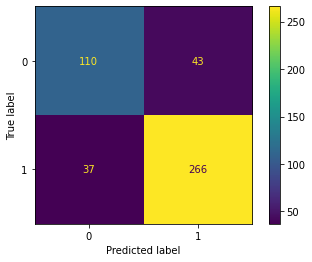

In [80]:
plot_confusion_matrix(LR_model,X_test,y_test);

In [81]:
print("classification_report on test data")
print(classification_report(y_test, y_test_predict))

classification_report on test data
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



### AUC and ROC for the test data

AUC: 0.890


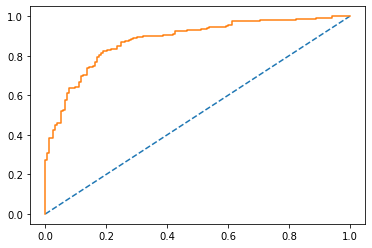

In [82]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Logistic Regression

In [83]:
grid={'penalty':['12',"11",'none'],
      'solver':['newton-cg'],
      'tol':[0.0001,0.00001],}


In [84]:
LR_GSCV_model = LogisticRegression(n_jobs=1,max_iter=10000, verbose =0)

In [85]:
grid_search = GridSearchCV(estimator = LR_GSCV_model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=1),
             n_jobs=-1,
             param_grid={'penalty': ['12', '11', 'none'],
                         'solver': ['newton-cg'], 'tol': [0.0001, 1e-05]},
             scoring='f1')

In [87]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=1, penalty='none', solver='newton-cg')


In [88]:
best_model_LR = grid_search.best_estimator_

In [89]:
# Prediction on the training set

y_train_predict = best_model_LR.predict(X_train)
y_test_predict = best_model_LR.predict(X_test)

In [90]:
## Getting the probabilities on the test set

y_test_predict_prob=best_model_LR.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593
5,0.057514,0.942486
6,0.372131,0.627869
7,0.221332,0.778668
8,0.042649,0.957351
9,0.140583,0.859417


In [91]:
# Accuracy - Training Data
best_model_LR.score(X_train, y_train)

0.8312912346842601

classification report for training data
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



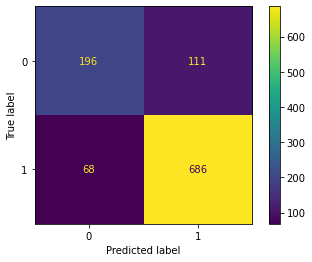

In [92]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_LR,X_train,y_train)
print("classification report for training data")
print(classification_report(y_train, y_train_predict),'\n');

### AUC and ROC for the training data

AUC: 0.890


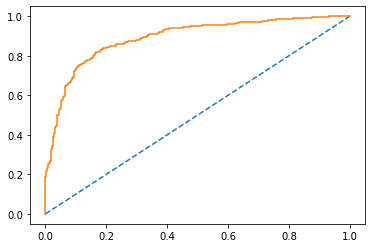

In [93]:
# predict probabilities
probs = best_model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [94]:
# Accuracy - TEST Data
best_model_LR.score(X_test, y_test)

0.8355263157894737

classification report for test data
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



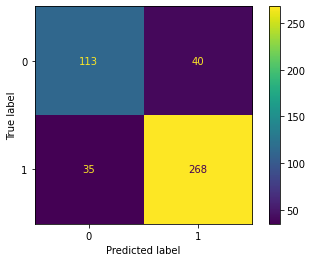

In [95]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_LR,X_test,y_test)
print("classification report for test data")
print(classification_report(y_test, y_test_predict),'\n');

### AUC and ROC for the test data

AUC: 0.890


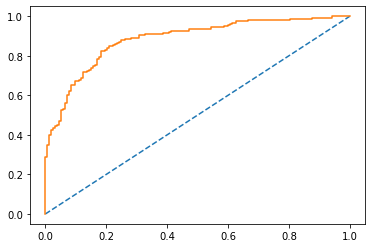

In [96]:
# predict probabilities
probs = best_model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Linear Discriminant Analysis without model tuning

In [97]:
#Build LDA Model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Prediction

In [98]:
# Training Data Class Prediction with a cut-off value of 0.5
y_train_predict = LDA_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
y_test_predict= LDA_model.predict(X_test)

In [99]:
LDA_model.score(X_train, y_train)

0.8341187558906692

### Getting the Predicted Classes and Probs for Train and test data

In [100]:
y_train_predict_prob=LDA_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_prob).head(10)

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839
5,0.030759,0.969241
6,0.211775,0.788225
7,0.003161,0.996839
8,0.700157,0.299843
9,0.080110,0.919890


In [101]:
y_test_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455
5,0.042605,0.957395
6,0.394497,0.605503
7,0.208650,0.791350
8,0.037967,0.962033
9,0.135804,0.864196


### Confusion Matrix & classification report for the training data

In [102]:
confusion_matrix(y_train, y_train_predict)

array([[200, 107],
       [ 69, 685]], dtype=int64)

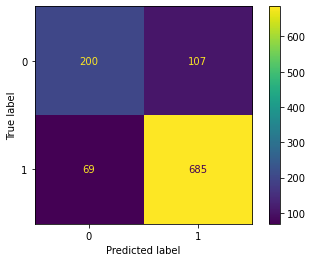

In [103]:
plot_confusion_matrix(LDA_model,X_train, y_train);

In [104]:
print("classification_report on training data")
print(classification_report(y_train, y_train_predict))

classification_report on training data
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



### AUC and ROC for the training data

AUC: 0.889


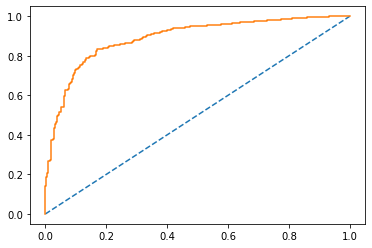

In [105]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Accurcacy on test data

In [106]:
LDA_model.score(X_test, y_test)

0.8333333333333334

### Confusion Matrix & classification report for the test data

In [107]:
confusion_matrix(y_test, y_test_predict)

array([[111,  42],
       [ 34, 269]], dtype=int64)

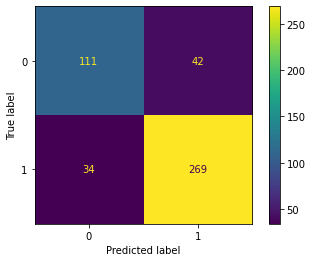

In [108]:
plot_confusion_matrix(LDA_model,X_test, y_test);

In [109]:
print("classification_report on test data")
print(classification_report(y_test, y_test_predict))

classification_report on test data
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



### AUC and ROC for the test data

AUC: 0.888


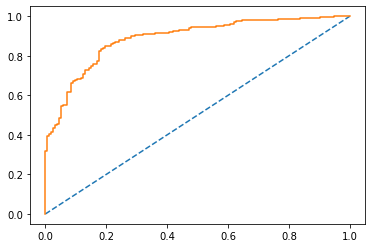

In [110]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.7587
F1 Score 0.8532 

Confusion Matrix


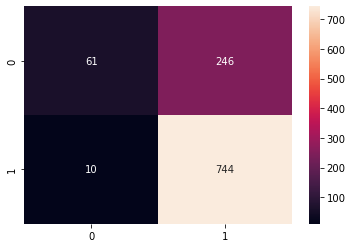

0.2 

Accuracy Score 0.7926
F1 Score 0.8689 

Confusion Matrix


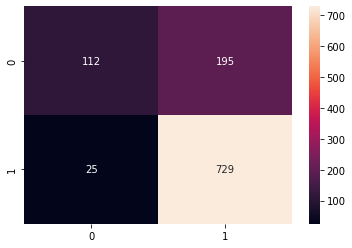

0.3 

Accuracy Score 0.8134
F1 Score 0.8787 

Confusion Matrix


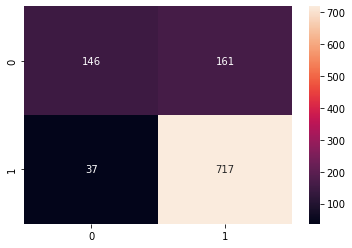

0.4 

Accuracy Score 0.8341
F1 Score 0.8897 

Confusion Matrix


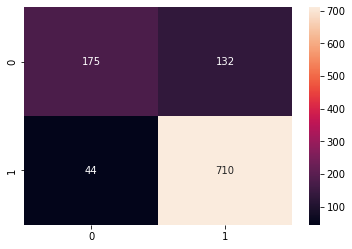

0.5 

Accuracy Score 0.8341
F1 Score 0.8862 

Confusion Matrix


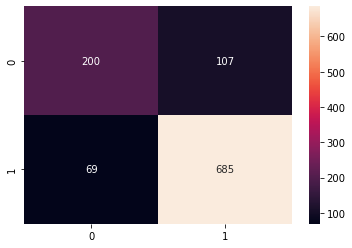

0.6 

Accuracy Score 0.8275
F1 Score 0.8781 

Confusion Matrix


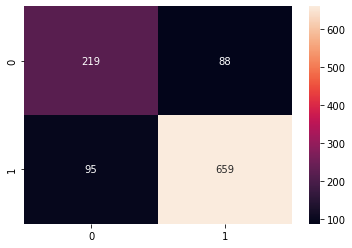

0.7 

Accuracy Score 0.8303
F1 Score 0.875 

Confusion Matrix


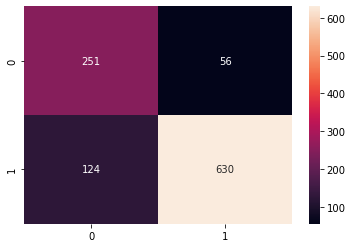

0.8 

Accuracy Score 0.7908
F1 Score 0.8363 

Confusion Matrix


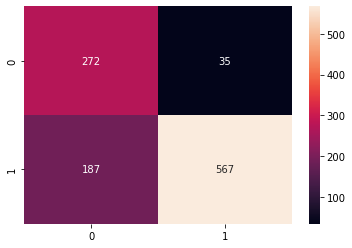

0.9 

Accuracy Score 0.6975
F1 Score 0.7384 

Confusion Matrix


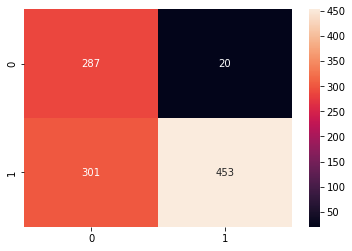

In [111]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(y_train_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.5 cut-off gives us the best accuracy score & 0.4 cut-off gives us the best'f1-score' and.So we will select best f1 score and evaluate the predictions of the test data using 0.4 cut-off value.

In [112]:
#Predicting the classes on the train data

data_pred_custom_cutoff1=[]
for i in range(0,len(y_train_predict_prob[:,1])):
    if np.array(y_train_predict_prob[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff1.append(a)

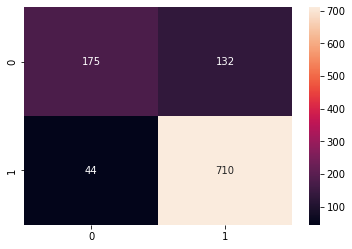

In [113]:
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff1)),annot=True,fmt='.5g');

In [114]:
#Predicting the classes on the test data
data_pred_custom_cutoff=[]
for i in range(0,len(y_test_predict_prob[:,1])):
    if np.array(y_test_predict_prob[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

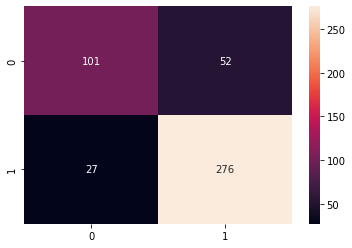

In [115]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');

In [116]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff1),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.80      0.57      0.67       307
           1       0.84      0.94      0.89       754

    accuracy                           0.83      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061
 



In [117]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.79      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456
 



## Linear Discriminant Analysis with GridsearchCV

In [118]:
grid={'solver': ['lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }

In [119]:
LDA_GSCV_model = LinearDiscriminantAnalysis()

In [120]:
grid_search = GridSearchCV(estimator = LDA_GSCV_model, param_grid = grid, cv = 5, scoring = 'f1',n_jobs=-1)

In [121]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='f1')

In [122]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(solver='lsqr')


In [123]:
best_model_LDA = grid_search.best_estimator_

In [124]:
# Prediction on the training set

y_train_predict = best_model_LDA.predict(X_train)
y_test_predict = best_model_LDA.predict(X_test)

In [125]:
## Getting the probabilities on the test set

y_test_predict_prob=best_model_LDA.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.462443,0.537557
1,0.133743,0.866257
2,0.006365,0.993635
3,0.861824,0.138176
4,0.056352,0.943648
5,0.042435,0.957565
6,0.394709,0.605291
7,0.208514,0.791486
8,0.037806,0.962194
9,0.135593,0.864407


In [126]:
# Accuracy - Training Data
best_model_LDA.score(X_train, y_train)

0.8341187558906692

classification_report on training data
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



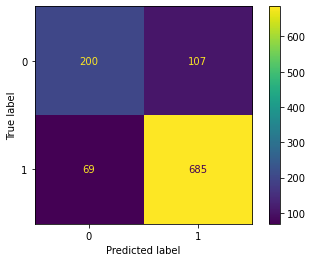

In [127]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_LDA,X_train,y_train)
print("classification_report on training data")
print(classification_report(y_train, y_train_predict),'\n');

## AUC & ROC on Training data

AUC: 0.889


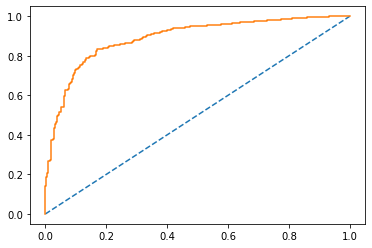

In [128]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [129]:
# Accuracy - TEST Data
best_model_LDA.score(X_test, y_test)

0.8333333333333334

classification_report on test data
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



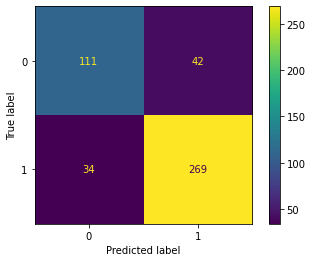

In [130]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_LDA,X_test,y_test)
print("classification_report on test data")
print(classification_report(y_test, y_test_predict),'\n');

## AUC & ROC on Test data

AUC: 0.888


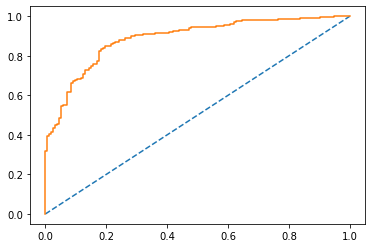

In [131]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)


## KNN Model

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered**

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore


In [133]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender_male'],
      dtype='object')

In [134]:
X[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender_male']]

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,1
1521,73,2,2,4,4,8,2,1
1522,37,3,3,5,4,2,2,1
1523,61,3,3,1,4,11,2,1


In [135]:
X_train1 = X_train[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender_male']]
X_train1

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
717,52,3,3,4,1,6,2,0
908,43,3,4,2,2,9,2,0
1100,74,4,3,5,4,11,0,0
236,31,3,3,2,3,6,0,0


In [136]:
X_train1 = zscore(X_train1)
X_train1

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
991,-1.296710,-1.455581,0.902100,-2.018037,1.029070,1.332089,0.452231,-0.936950
1274,-0.910337,0.877307,-0.163744,0.550300,1.029070,-0.202156,-1.407526,1.067292
649,0.441968,0.877307,-0.163744,0.550300,1.029070,0.104693,0.452231,-0.936950
677,-0.459569,-0.289137,-0.163744,0.550300,-0.593283,1.332089,-1.407526,1.067292
538,-0.652755,2.043751,-0.163744,0.550300,-0.593283,0.411542,-1.407526,1.067292
...,...,...,...,...,...,...,...,...
717,-0.137592,-0.289137,-0.163744,0.550300,-1.404459,-0.202156,0.452231,-0.936950
908,-0.717151,-0.289137,0.902100,-1.161925,-0.593283,0.718391,0.452231,-0.936950
1100,1.279109,0.877307,-0.163744,1.406413,1.029070,1.332089,-1.407526,-0.936950
236,-1.489897,-0.289137,-0.163744,-1.161925,0.217894,-0.202156,-1.407526,-0.936950


In [137]:
y_train

991     0
1274    1
649     0
677     1
538     1
       ..
717     1
908     0
1100    1
236     1
1065    1
Name: vote, Length: 1061, dtype: int32

In [138]:
X_test1 = X_test[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender_male']]
X_test1

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1
...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1
928,42,2,2,1,2,7,2,0
276,88,3,3,4,1,6,0,0
1128,53,4,3,4,2,10,0,0


In [139]:
X_test1= zscore(X_test1)
X_test1

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
504,1.027267,-0.255557,-0.110599,-1.082257,-0.643946,0.316674,0.360390,-0.936239
369,-0.714354,-0.255557,-1.206968,0.602075,-0.643946,0.316674,1.268333,1.068103
1075,2.146881,1.882680,2.082140,1.444241,-0.643946,-1.754684,0.360390,1.068103
1031,-0.465551,-1.324675,-0.110599,-1.082257,0.982865,0.316674,0.360390,-0.936239
1329,-1.336362,1.882680,0.985771,0.602075,0.982865,0.316674,-1.455497,1.068103
...,...,...,...,...,...,...,...,...
562,-1.087559,0.813562,-1.206968,0.602075,-0.643946,0.316674,-0.547554,1.068103
928,-0.776555,-1.324675,-1.206968,-1.924423,-0.643946,0.020765,0.360390,-0.936239
276,2.084680,-0.255557,-0.110599,0.602075,-1.457352,-0.275143,-1.455497,-0.936239
1128,-0.092346,0.813562,-0.110599,0.602075,-0.643946,0.908490,-1.455497,-0.936239


In [140]:
y_test

504     1
369     1
1075    1
1031    0
1329    1
       ..
562     1
928     1
276     1
1128    1
1151    1
Name: vote, Length: 456, dtype: int32

In [141]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train1,y_train)

KNeighborsClassifier()

In [142]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train1)
KNN_model_score = KNN_model.score(X_train1, y_train)
print("KNN model Train data accuracy =", KNN_model_score)


KNN model Train data accuracy = 0.8539114043355325


In [143]:
y_train_predict_prob=KNN_model.predict_proba(X_train1)
pd.DataFrame(y_train_predict_prob).head(10)

,0,1
0,1.0,0.0
1,0.2,0.8
2,0.4,0.6
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.4,0.6
7,0.0,1.0
8,0.8,0.2
9,0.0,1.0


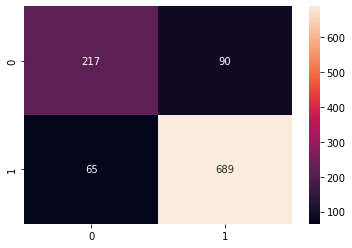

In [144]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)),annot=True,fmt='.5g');

In [145]:
print("classification_report on training data")
print(metrics.classification_report(y_train, y_train_predict))

classification_report on training data
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.928


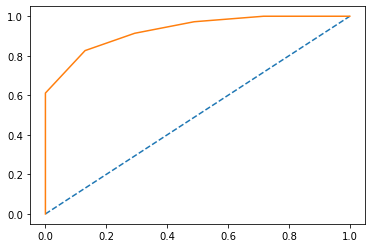

In [146]:
# predict probabilities
probs = KNN_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [147]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test1)
KNN_model_score = KNN_model.score(X_test1, y_test)
print("KNN model Test data accuracy =", KNN_model_score)


KNN model Test data accuracy = 0.8267543859649122


In [148]:
y_test_predict_prob=KNN_model.predict_proba(X_test1)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.8,0.2
1,0.2,0.8
2,0.0,1.0
3,0.8,0.2
4,0.0,1.0
5,0.0,1.0
6,0.8,0.2
7,0.4,0.6
8,0.0,1.0
9,0.4,0.6


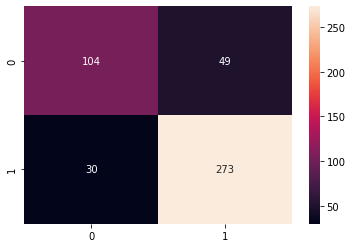

In [149]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g');

In [150]:
print("classification_report on test data")
print(metrics.classification_report(y_test, y_test_predict))

classification_report on test data
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC: 0.928


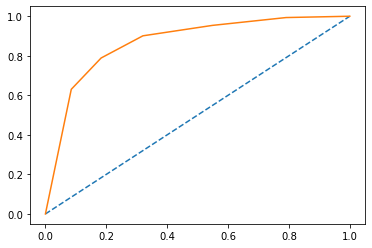

In [151]:
# predict probabilities
probs = KNN_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Default value n_neighbors=5
**Run the KNN with no of neighbours to be 1,3,5..41 and *Find the optimal number of neighbours from K=1,3,5,7.....41 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5,7,....41 and find the model with lowest MCE

In [152]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,41,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test1, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22368421052631582,
 0.19736842105263153,
 0.17324561403508776,
 0.18201754385964908,
 0.17763157894736847,
 0.16666666666666663,
 0.17543859649122806,
 0.17543859649122806,
 0.17324561403508776,
 0.17105263157894735,
 0.17543859649122806,
 0.17543859649122806,
 0.17763157894736847,
 0.17763157894736847,
 0.18201754385964908,
 0.1842105263157895,
 0.1842105263157895,
 0.17324561403508776,
 0.1842105263157895,
 0.1885964912280702]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

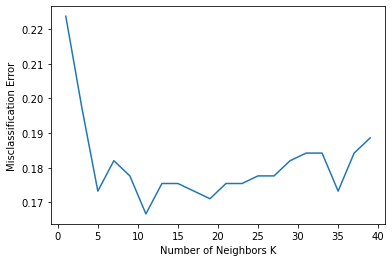

In [153]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,41,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [154]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train1,y_train)

KNeighborsClassifier(n_neighbors=11)

accuracy= 0.8426013195098964
confusion matrix
classification report for train data
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



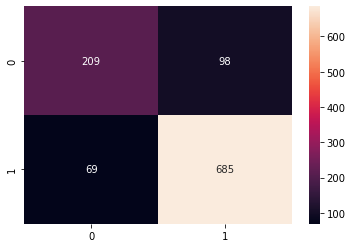

In [155]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train1)
model_score = KNN_model.score(X_train1, y_train)
print("accuracy=",model_score)
print("confusion matrix")
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)),annot=True,fmt='.5g')
print("classification report for train data")
print(metrics.classification_report(y_train, y_train_predict))

accuracy= 0.8333333333333334
confusion matrix
classification report for test data
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



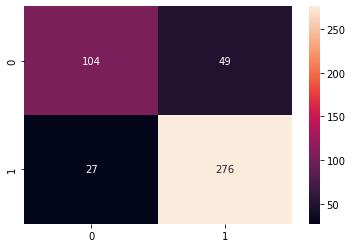

In [156]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test1)
model_score = KNN_model.score(X_test1, y_test)
print("accuracy=",model_score)
print("confusion matrix")
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict),annot=True,fmt='.5g')
print("classification report for test data")
print(metrics.classification_report(y_test, y_test_predict))

Hence, we can say that the lowest value of Misclassiﬁcation Error is at k=11. Also, we have seen above thataccuracy score for KNN Model at k=15 is 84% which is considered a good accuracy score and the diﬀerencebetween train and test accuracies is less than 10%, it is a valid model. Therefore, we can say that the optimalvalue of k is 11 for this particular model

## KNN Model with GridsearchCV

In [157]:
grid = {'n_neighbors': [11],
               'weights' : ['uniform'],  #['uniform','distance'],
              }

In [158]:
KNN_GSCV_model = KNeighborsClassifier()

In [159]:
grid_search = GridSearchCV(estimator = KNN_GSCV_model, param_grid = grid, cv = 3)

In [160]:
grid_search.fit(X_train1, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11], 'weights': ['uniform']})

In [161]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_neighbors': 11, 'weights': 'uniform'} 

KNeighborsClassifier(n_neighbors=11)


In [162]:
best_model_KNN= grid_search.best_estimator_

In [163]:
# Prediction on the training set % test set

y_train_predict = best_model_LDA.predict(X_train1)
y_test_predict = best_model_LDA.predict(X_test1)

In [164]:
## Getting the probabilities on the test set

y_test_predict_prob=best_model_LDA.predict_proba(X_test1)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.132791,0.867209
1,0.046655,0.953345
2,0.002725,0.997275
3,0.562616,0.437384
4,0.016308,0.983692
5,0.031350,0.968650
6,0.093684,0.906316
7,0.042758,0.957242
8,0.019426,0.980574
9,0.028713,0.971287


In [165]:
# Accuracy - Training Data
best_model_KNN.score(X_train1, y_train)

0.8426013195098964

              precision    recall  f1-score   support

           0       0.82      0.23      0.36       307
           1       0.76      0.98      0.85       754

    accuracy                           0.76      1061
   macro avg       0.79      0.61      0.61      1061
weighted avg       0.78      0.76      0.71      1061
 



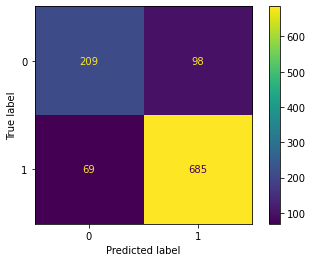

In [166]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_KNN,X_train1,y_train)
print(classification_report(y_train, y_train_predict),'\n');

## AUC & ROC on Training data

AUC: 0.909


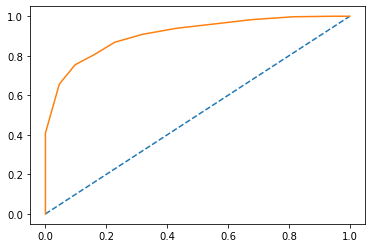

In [167]:
# predict probabilities
probs = best_model_KNN.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [168]:
# Accuracy - Test Data
best_model_KNN.score(X_test1, y_test)

0.8333333333333334

              precision    recall  f1-score   support

           0       0.83      0.23      0.36       153
           1       0.71      0.98      0.83       303

    accuracy                           0.73       456
   macro avg       0.77      0.60      0.59       456
weighted avg       0.75      0.73      0.67       456
 



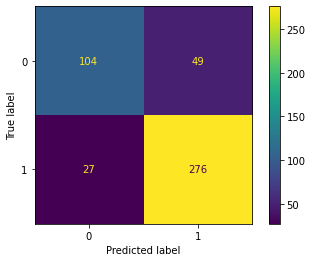

In [169]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_KNN,X_test1,y_test)
print(classification_report(y_test, y_test_predict),'\n');

## AUC & ROC on Training data

AUC: 0.889


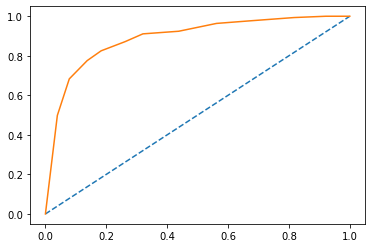

In [170]:
# predict probabilities
probs = best_model_KNN.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Gaussian Naive Bayes

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

In [171]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

In [172]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Performance Matrix on train data set**

In [173]:
y_train_predict = NB_model.predict(X_train)
NB_model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print("The accuracy of Train data set for NB model =", NB_model_score)


The accuracy of Train data set for NB model = 0.8350612629594723


In [174]:
y_train_predict_prob=NB_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_prob).head(10)

,0,1
0,0.984678,0.015322
1,0.065437,0.934563
2,0.271735,0.728265
3,0.080026,0.919974
4,0.007648,0.992352
5,0.053108,0.946892
6,0.121818,0.878182
7,0.000977,0.999023
8,0.630644,0.369356
9,0.029508,0.970492


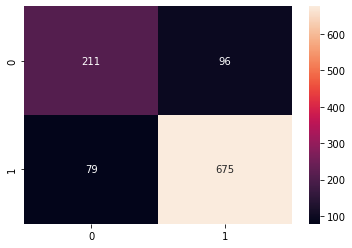

In [175]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)),annot=True,fmt='.5g');   ## confusion_matrix

In [176]:
print("classification_report on training data")
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

classification_report on training data
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.888


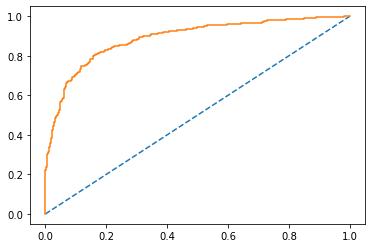

In [177]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [178]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
NB_model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print("The accuracy of Test data set for NB model =", NB_model_score)


The accuracy of Test data set for NB model = 0.8223684210526315


In [179]:
y_test_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head(10)

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733
5,0.022669,0.977331
6,0.367634,0.632366
7,0.208123,0.791877
8,0.011473,0.988527
9,0.067547,0.932453


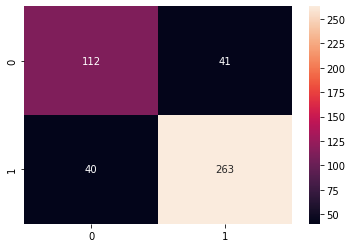

In [180]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');         ## confusion_matrix


In [181]:
print("classification_report on test data")
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

classification_report on test data
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.876


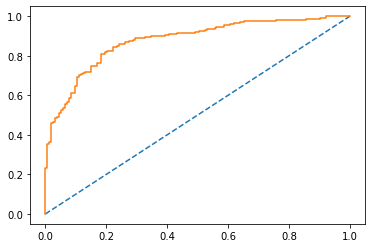

In [182]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

## NB with GridSearchCV

In [183]:
param_grid_NB={
    'var_smoothing': np.logspace(0,-9, num =100)}

In [184]:
NB_model_grid= GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_NB, verbose=1, cv=10)
NB_model_grid.fit(X_train, y_train)
print(NB_model_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0015199110829529332)


In [185]:
y_train_predict=NB_model_grid.predict(X_train)
NB_model_grid_score = NB_model.score(X_train, y_train)
print("NB Model Score after Grid Search for Train Data is" ,NB_model_grid_score) 

NB Model Score after Grid Search for Train Data is 0.8350612629594723


In [186]:
 # Confusion Matrix of NB Model-Train Data
print(metrics.classification_report(y_train,y_train_predict))


              precision    recall  f1-score   support

           0       0.73      0.66      0.70       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



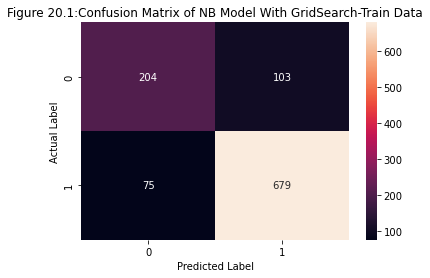

In [187]:
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Figure 20.1:Confusion Matrix of NB Model With GridSearch-Train Data')
plt.show()


AUC of NB Model with GridSearch is 0.885 


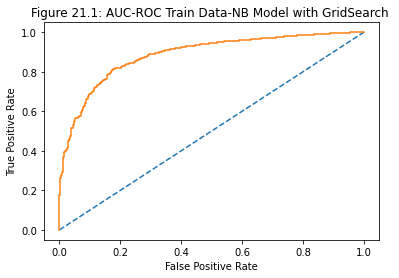

In [188]:
probs_train=NB_model_grid.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("AUC of NB Model with GridSearch is %.3f " % auc)
train_fpr ,train_tpr, train_thresholds =roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 21.1: AUC-ROC Train Data-NB Model with GridSearch ")
y_test_predict=NB_model_grid.predict(X_test)
NB_model_grid_score=NB_model.score(X_test, y_test)



In [189]:
y_test_predict=NB_model_grid.predict(X_test)
NB_model_grid_score=NB_model.score(X_test, y_test)
print("NB Model Score after Grid Search for Test Data is" ,NB_model_grid_score)


NB Model Score after Grid Search for Test Data is 0.8223684210526315


In [190]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))


[[108  45]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



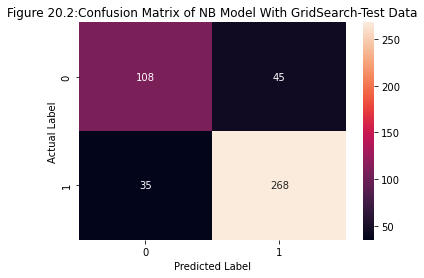

In [191]:
ax=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Figure 20.2:Confusion Matrix of NB Model With GridSearch-Test Data')

plt.show()


the auc curve 0.879 


Text(0.5, 1.0, 'Figure 21.2: AUC-ROC Test Data-NB Model with GridSearch ')

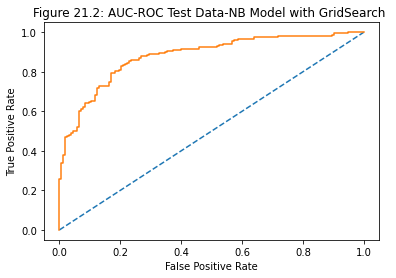

In [192]:
probs_test=NB_model_grid.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " %auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 21.2: AUC-ROC Test Data-NB Model with GridSearch ")


1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Bagging
Idea of Bagging: To ﬁt several independent models and “average” their predictions in order to obtain a model with a lower variance. However, in practice, it requires too much data to ﬁt fully independent models . 
So, we rely on the good “approximate properties” of bootstrap samples (representativity and independence) to ﬁt models that are almost independent.
Note:A Bagging classiﬁer is an ensemble meta-estimator that ﬁts base classiﬁers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by  averaging) to form a ﬁnal prediction. 
    When samples are drawn with replacement, then the method is known as Bagging

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.
It is a general procedure that can be used to reduce the variance for those algorithm that have high variance. 
An algorithmthat has high variance are decision trees, like classiﬁcation and regression trees (CART).
Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.
Hence, we will build the Bagging model using Decison Tree as the base estimator and than ﬁt the model.
We know that, Decision trees are sensitive to the speciﬁc data on which they are trained. 
If the training data ischanged (e.g. a tree is trained on a subset of the training data) 
the resulting decision tree can be quite diﬀerentand in turn the predictions can be quite diﬀerent.
Bagging of the CART algorithm would work as follows:
    1. Create many (e.g. 100) random sub-samples of our dataset with replacement.
    2. Train a CART model on each sample.
    3. Given a new dataset, calculate the average prediction from each model.
Listing below few parmeters used:
    base_estimator: The base estimator to ﬁt on random subsets of the dataset.Here, we are using DecisionTree Classiﬁer to improve accuracy and reduce variance.
    n_estimatorsint:The number of base estimators in the ensemble.HEre we are taking 100.
        random_state: Controls the random resampling of the original dataset (sample wise and feature wise).



## Bagging using RandomForest

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


rfcl = RandomForestClassifier(n_estimators = 100,random_state=123)
rfcl.fit(X_train, y_train)

In [194]:
rfcl = RandomForestClassifier(max_depth= 15,max_features= 6,
 min_samples_leaf= 10,
 min_samples_split= 30,
 n_estimators= 200)
rfcl.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_features=6, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=200)

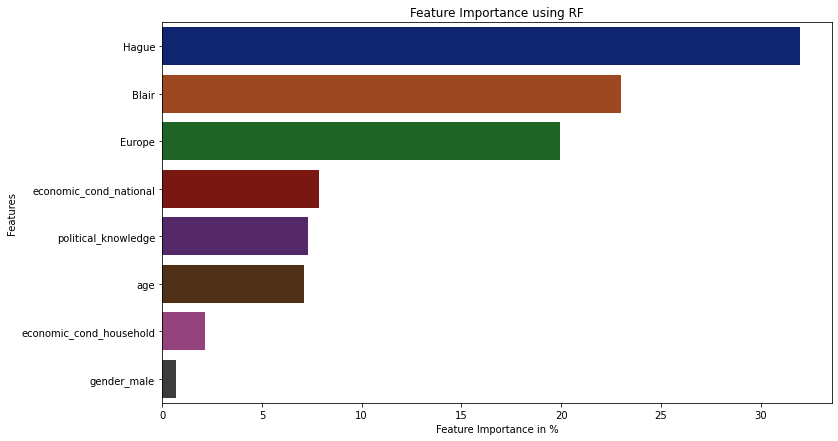

In [195]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()


In [196]:
### Check Feature Importances

In [197]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.319666
Blair                    0.230009
Europe                   0.199170
economic_cond_national   0.078580
political_knowledge      0.073175
age                      0.070937
economic_cond_household  0.021460
gender_male              0.007004


In [198]:
print("classification report for training data")
print(classification_report(y_train,y_train_predict))

classification report for training data
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [199]:
print("classification report for test data")
print(classification_report(y_test,y_test_predict))

classification report for test data
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [200]:
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=15,
                                                        max_features=6,
                                                        min_samples_leaf=10,
                                                        min_samples_split=30,
                                                        n_estimators=200),
                  n_estimators=100, random_state=1)

In [201]:
y_train_predict = Bagging_model.predict(X_train)
y_test_predict = Bagging_model.predict(X_test)

In [202]:
## Performance Matrix on Train data set
Bagging_train_score=Bagging_model.score(X_train, y_train)
print("Bagging_train_score is" ,Bagging_train_score) 

Bagging_train_score is 0.8567389255419415


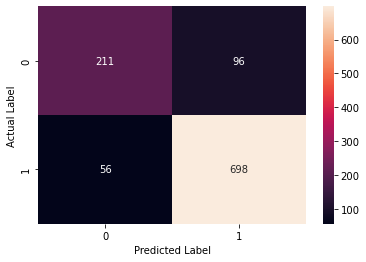

In [203]:
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [204]:
 # Confusion Matrix of NB Model-Train Data
print("classification report for training data")
print(metrics.classification_report(y_train,y_train_predict))

classification report for training data
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AUC: 0.879


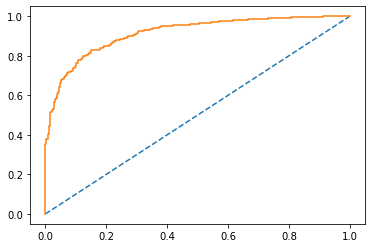

In [205]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [206]:
## Performance Matrix on test data set
Bagging_test_score=Bagging_model.score(X_test, y_test)
print("Bagging_train_score is" ,Bagging_test_score) 

Bagging_train_score is 0.8289473684210527


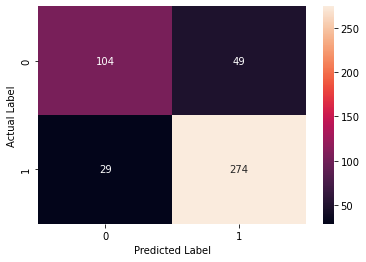

In [207]:
ax=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [208]:
 # Confusion Matrix of NB Model-Train Data
print("classification report for test data")
print(metrics.classification_report(y_test,y_test_predict))

classification report for test data
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.879


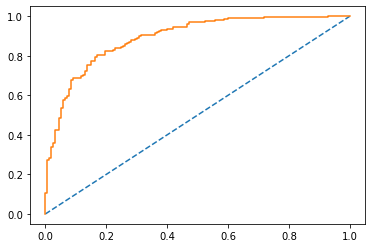

In [209]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Ada Boost

In [210]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

accuracy 0.8501413760603205
confusion matrix for training data
classification_report for training data
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



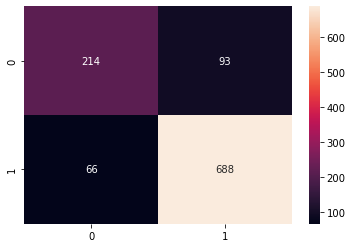

In [211]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print("accuracy",model_score)
print("confusion matrix for training data")
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict),annot=True, fmt='d')
print("classification_report for training data")
print(metrics.classification_report(y_train, y_train_predict))

AUC: 0.879


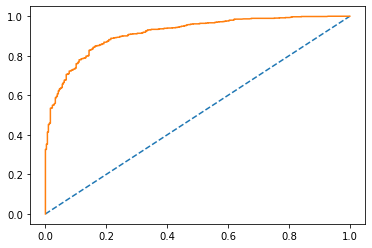

In [212]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

accuracy 0.8135964912280702
confusion matrix for test data
classification_report for test data
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



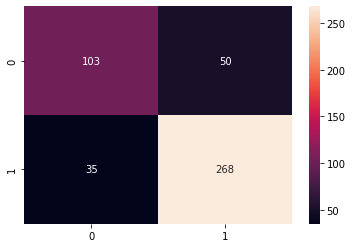

In [213]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print("accuracy",model_score)
print("confusion matrix for test data")
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict),annot=True, fmt='d')
print("classification_report for test data")
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.879


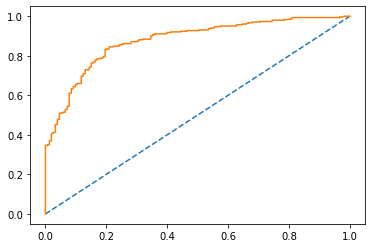

In [214]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Gradient Boosting

In [215]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

accuracy 0.8925541941564562
confusion matrix for training data
classification_report for traning data
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



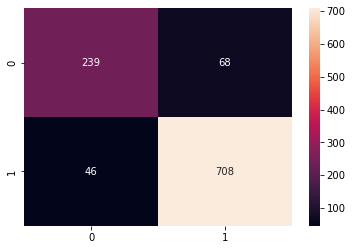

In [216]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("accuracy",model_score)
print("confusion matrix for training data")
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict),annot=True, fmt='d')
print("classification_report for traning data")
print(metrics.classification_report(y_train, y_train_predict))

AUC: 0.879


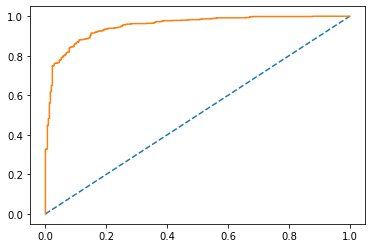

In [217]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

accuracy 0.8355263157894737
confusion matrix for test data
classification_report for test data
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



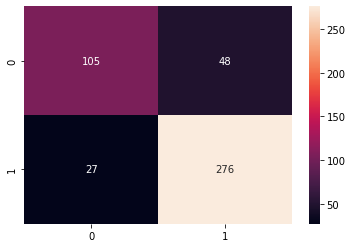

In [218]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("accuracy",model_score)
print("confusion matrix for test data")
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict),annot=True, fmt='d')

print("classification_report for test data")
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.879


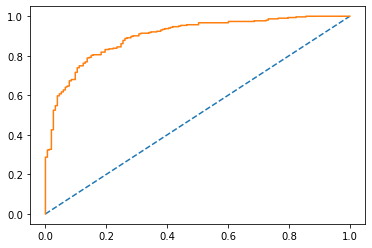

In [219]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### XGBoost Classifier

In [220]:
!pip install xgboost 
from xgboost import XGBClassifier

In [221]:
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

accuracy 0.9066918001885014
confusion matrix for training data
classification_report for training data
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       307
           1       0.92      0.95      0.94       754

    accuracy                           0.91      1061
   macro avg       0.89      0.88      0.88      1061
weighted avg       0.91      0.91      0.91      1061



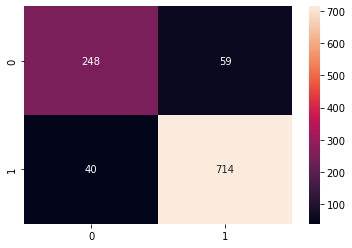

In [222]:
## Performance Matrix on train data set
y_train_predict = xgb.predict(X_train)
model_score = xgb.score(X_train, y_train)
print("accuracy",model_score)
print("confusion matrix for training data")
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict),annot=True, fmt='d')
print("classification_report for training data")
print(metrics.classification_report(y_train, y_train_predict))

AUC: 0.879


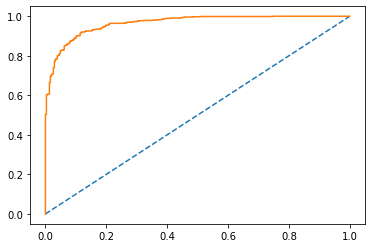

In [223]:
# predict probabilities
probs = xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

accuracy 0.8289473684210527
confusion matrix for test data
classification_report for test data
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



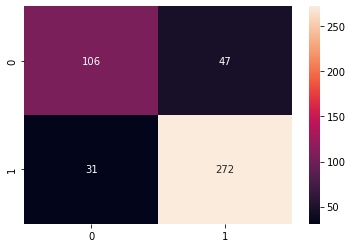

In [224]:
## Performance Matrix on test data set
y_test_predict = xgb.predict(X_test)
model_score = xgb.score(X_test, y_test)
print("accuracy",model_score)
print("confusion matrix for test data")
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict),annot=True, fmt='d')
print("classification_report for test data")
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.879


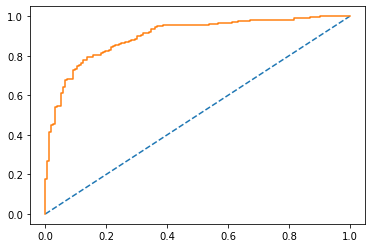

In [225]:
# predict probabilities
probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

1.8 Based on these predictions, what are the insights? (5 marks)

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

    President Franklin D. Roosevelt in 1941
    President John F. Kennedy in 1961
    President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)



Code Snippet to extract the three speeches:

"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

In [226]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import string
!pip install wordcloud

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\212548638\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\212548638\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [227]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.5
Matplotlib version: 3.4.3


2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks



In [228]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [229]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [230]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [231]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [232]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [233]:
inaugural_speech

,text
1941-Roosevelt,On each national day of inauguration since 178...
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## Number of words

In [234]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,text,word_count
1941-Roosevelt,On each national day of inauguration since 178...,1323
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


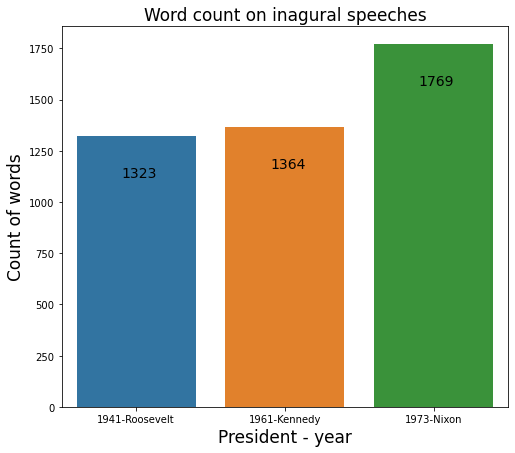

In [235]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x=index, data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

## Number of Characters- including spaces

In [236]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech


,text,word_count,char_count
1941-Roosevelt,On each national day of inauguration since 178...,1323,7571
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991


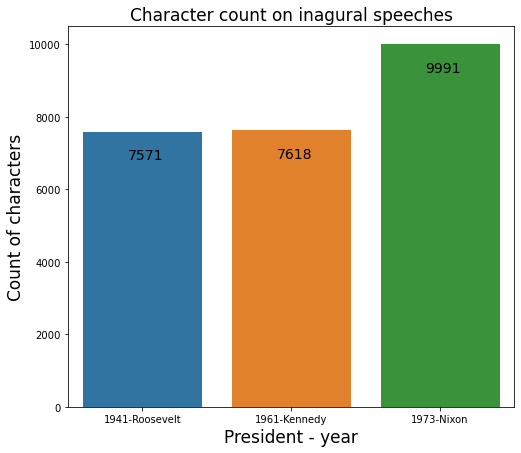

In [237]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='char_count', x=index, data=inaugural_speech)
plt.title('Character count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of characters',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

## Number of sentences

In [238]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,text,word_count,char_count,sents_count
1941-Roosevelt,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


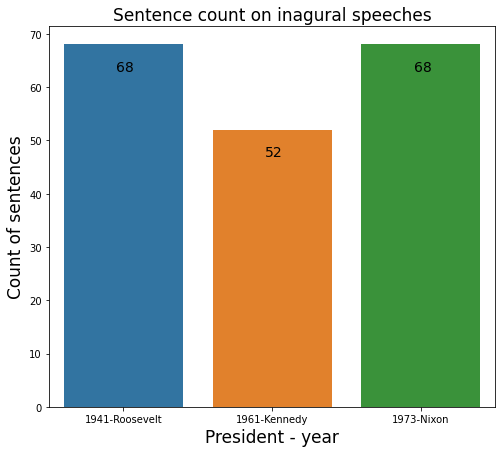

In [239]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='sents_count', x=index, data=inaugural_speech)
plt.title('Sentence count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of sentences',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

2.2 Remove all the stopwords from all three speeches. – 3 Marks



In [240]:
inaugural_speech['text']

1941-Roosevelt    On each national day of inauguration since 178...
1961-Kennedy      Vice President Johnson, Mr. Speaker, Mr. Chief...
1973-Nixon        Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: text, dtype: object

## Basic Pre-Processing

### Number of Uppercase Words

In [241]:
inaugural_speech['upper'] = inaugural_speech['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
inaugural_speech[['text','upper']].head()

,text,upper
1941-Roosevelt,On each national day of inauguration since 178...,3
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",14


### Number of Uppercase Letters

In [242]:
inaugural_speech['upper_letter'] = inaugural_speech['text'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
inaugural_speech[['text','upper_letter']].head()

,text,upper_letter
1941-Roosevelt,On each national day of inauguration since 178...,119
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",94
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",132


### Number of numerics

In [243]:
inaugural_speech['numerics'] = inaugural_speech['text'].apply(lambda x: len(re.findall(r'[0-9]',x)))
inaugural_speech[['text','numerics']].head()

,text,numerics
1941-Roosevelt,On each national day of inauguration since 178...,14
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10


### Lower case conversion

In [244]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

### Remove punctuation

In [245]:
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

### Removal of StopWords

In [246]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\212548638\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [247]:
stop_words = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stop_words.extend(['mr','on','it','the','in','let','to','us','shall','since'])
stop_words=set(stop_words)
stop_words

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'let',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mr',
 'mustn',
 "mustn't",
 'my',
 '

In [248]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech['text'].head()

1941-Roosevelt    national day inauguration 1789 people renewed ...
1961-Kennedy      vice president johnson speaker chief justice p...
1973-Nixon        vice president speaker chief justice senator c...
Name: text, dtype: object

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [249]:
from nltk.stem import PorterStemmer

st = PorterStemmer()
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
inaugural_speech['text'].head()

1941-Roosevelt    nation day inaugur 1789 peopl renew sens dedic...
1961-Kennedy      vice presid johnson speaker chief justic presi...
1973-Nixon        vice presid speaker chief justic senat cook mr...
Name: text, dtype: object

In [250]:
inaugural_speech['word_count1'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,text,word_count,char_count,sents_count,upper,upper_letter,numerics,word_count1
1941-Roosevelt,nation day inaugur 1789 peopl renew sens dedic...,1323,7571,68,3,119,14,616
1961-Kennedy,vice presid johnson speaker chief justic presi...,1364,7618,52,5,94,7,657
1973-Nixon,vice presid speaker chief justic senat cook mr...,1769,9991,68,14,132,10,774


In [251]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech.index =="1941-Roosevelt"].text)

Speech of president Roosevelt without stopwords


['nation day inaugur 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fact demo

In [252]:
print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech.index=="1961-Kennedy"].text)

Speech of president Kennedy without stopwords


['vice presid johnson speaker chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world everi nation know whether wish well ill pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend unit littl cannot host c

In [253]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech.index =="1973-Nixon"].text)

Speech of president Nixon without stopwords


['vice presid speaker chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question use peac resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw farreach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi 1972 long rememb year greatest progress end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom clearli understand new natur america role 

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks



In [254]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,0]).split()).value_counts()[:3]
print("Top three words occurs the most number of times in inaugural address by Roosevelt",'\n', freq)


Top three words occurs the most number of times in inaugural address by Roosevelt 
 nation       17
know         10
democraci     9
dtype: int64


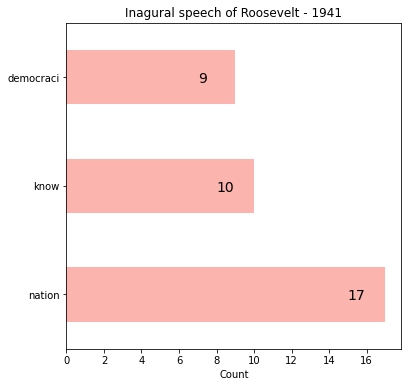

In [255]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [256]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,0]).split()).value_counts()[:3]
print("Top three words occurs the most number of times in inaugural address by Kennedy",'\n', freq)

Top three words occurs the most number of times in inaugural address by Kennedy 
 power    9
world    8
side     8
dtype: int64


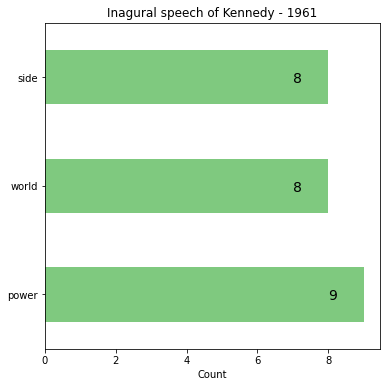

In [257]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [258]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,0]).split()).value_counts()[:3]
print("Top three words occurs the most number of times in inaugural address by Nixon",'\n', freq)

Top three words occurs the most number of times in inaugural address by Nixon 
 america    21
peac       19
world      18
dtype: int64


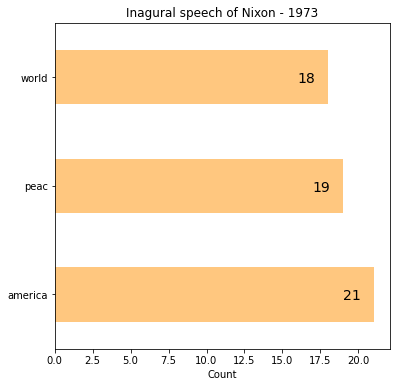

In [259]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [260]:
nltk.FreqDist(inaugural_speech['text'])

FreqDist({'nation day inaugur 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain 

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [261]:
freq = pd.Series(' '.join(inaugural_speech['text']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

prove       1
unwil       1
ill         1
wit         1
permit      1
slow        1
fatalist    1
frozen      1
wish        1
strive      1
dtype: int64

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]



Word Cloud for Roosewelt after cleaning


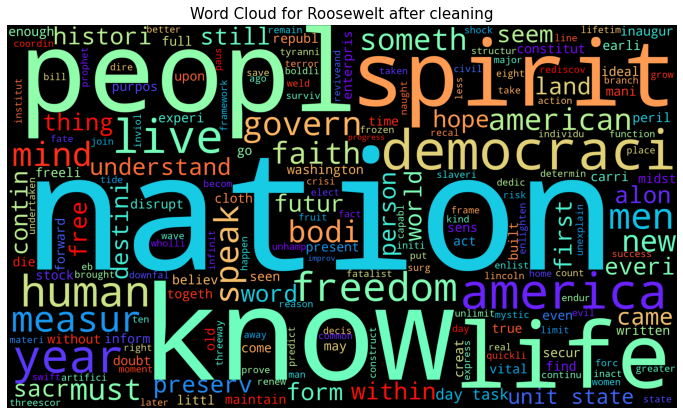

In [262]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
words = ' '.join(inaugural_speech.iloc[1:2,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
words = ' '.join(inaugural_speech.iloc[2:3,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()